# ICP 6 - Question 4
#### data set:https://umkc.box.com/s/a9lzu9qoqfkbhjwk5nz9m6dyybhl1wqy
#### Visualize the clustering of first bonus question

This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
Following is the Data Dictionary for Credit Card dataset :
1. CUST_ID: Identification of Credit Card holder (Categorical) 
2. BALANCE: Balance amount left in their account to make purchases 
3. BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
4. PURCHASES: Amount of purchases made from account 
5. ONEOFF_PURCHASES: Maximum purchase amount done in one-go 
6. INSTALLMENTS_PURCHASES: Amount of purchase done in installment 
7. CASH_ADVANCE: Cash in advance given by the user 
8. PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 
9. ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
10. PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY: How frequently thecash in advance being paid 
12. CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" 
13. PURCHASES_TRX: Numbe of purchase transactions made
14. CREDIT_LIMIT: Limit of Credit Card for user
15. PAYMENTS: Amount of Payment done by user
16. MINIMUM_PAYMENTS: Minimum amount of payments made by user 
17. PRCFULLPAYMENT: Percent of full payment paid by user 
18. Tenure of credit card service for user

In [1]:
#Importing Libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
Credit_Card_Data = pd.read_csv('CC.csv')
Credit_Card_Data.head() #printing first five rows

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [12]:
#Finding the unique values in TENURE column
Credit_Card_Data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [29]:
import numpy as np

#### Visualisation of clustering with features

In [30]:
#Working with Numeric Features for getting top most correlated features with TENURE feature
numeric_features = Credit_Card_Data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['TENURE'].sort_values(ascending=False)[:6], '\n')
print (corr['TENURE'].sort_values(ascending=False)[-6:])

TENURE               1.000000
CREDIT_LIMIT         0.139034
PURCHASES_TRX        0.121874
BALANCE_FREQUENCY    0.119776
PAYMENTS             0.106136
PURCHASES            0.086288
Name: TENURE, dtype: float64 

PURCHASES_FREQUENCY       0.061506
MINIMUM_PAYMENTS          0.057257
PRC_FULL_PAYMENT         -0.016486
CASH_ADVANCE_TRX         -0.043421
CASH_ADVANCE             -0.068312
CASH_ADVANCE_FREQUENCY   -0.133372
Name: TENURE, dtype: float64


#### We could see the top most correlated features with TENURE

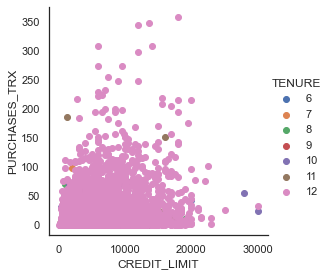

In [31]:
sns.FacetGrid(Credit_Card_Data, hue="TENURE", size=4).map(plt.scatter, "CREDIT_LIMIT", "PURCHASES_TRX").add_legend()

### From above graph we can diferentiate the TENURE value with CREDIT_LIMIT and PURCHASES_TRX for some extent

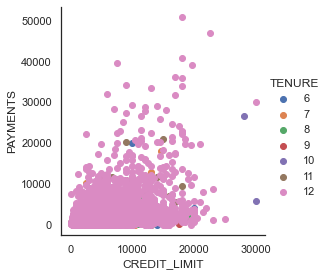

In [33]:
sns.FacetGrid(Credit_Card_Data, hue="TENURE", size=4).map(plt.scatter, "CREDIT_LIMIT", "PAYMENTS").add_legend()

### From above graph we can diferentiate the TENURE value with CREDIT_LIMIT and PAYMENTS for some extent

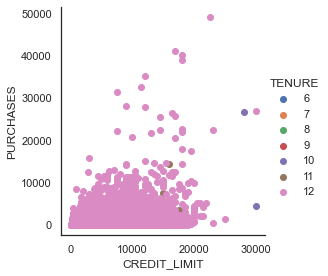

In [34]:
sns.FacetGrid(Credit_Card_Data, hue="TENURE", size=4).map(plt.scatter, "CREDIT_LIMIT", "PURCHASES").add_legend()

### From above graph we can diferentiate the tenure value with PURCHASES and CREDIT_LIMIT for some extent

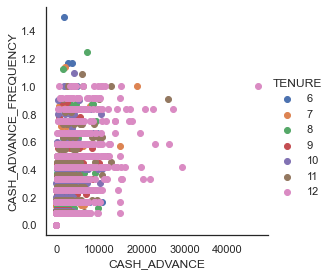

In [35]:
sns.FacetGrid(Credit_Card_Data, hue="TENURE", size=4).map(plt.scatter, "CASH_ADVANCE", "CASH_ADVANCE_FREQUENCY").add_legend()

#### From above graph we cannot diferentiate the tenure value with CASH_ADVANCE and CASH_ADVANCE_FREQUENCY, since they are least correlated features

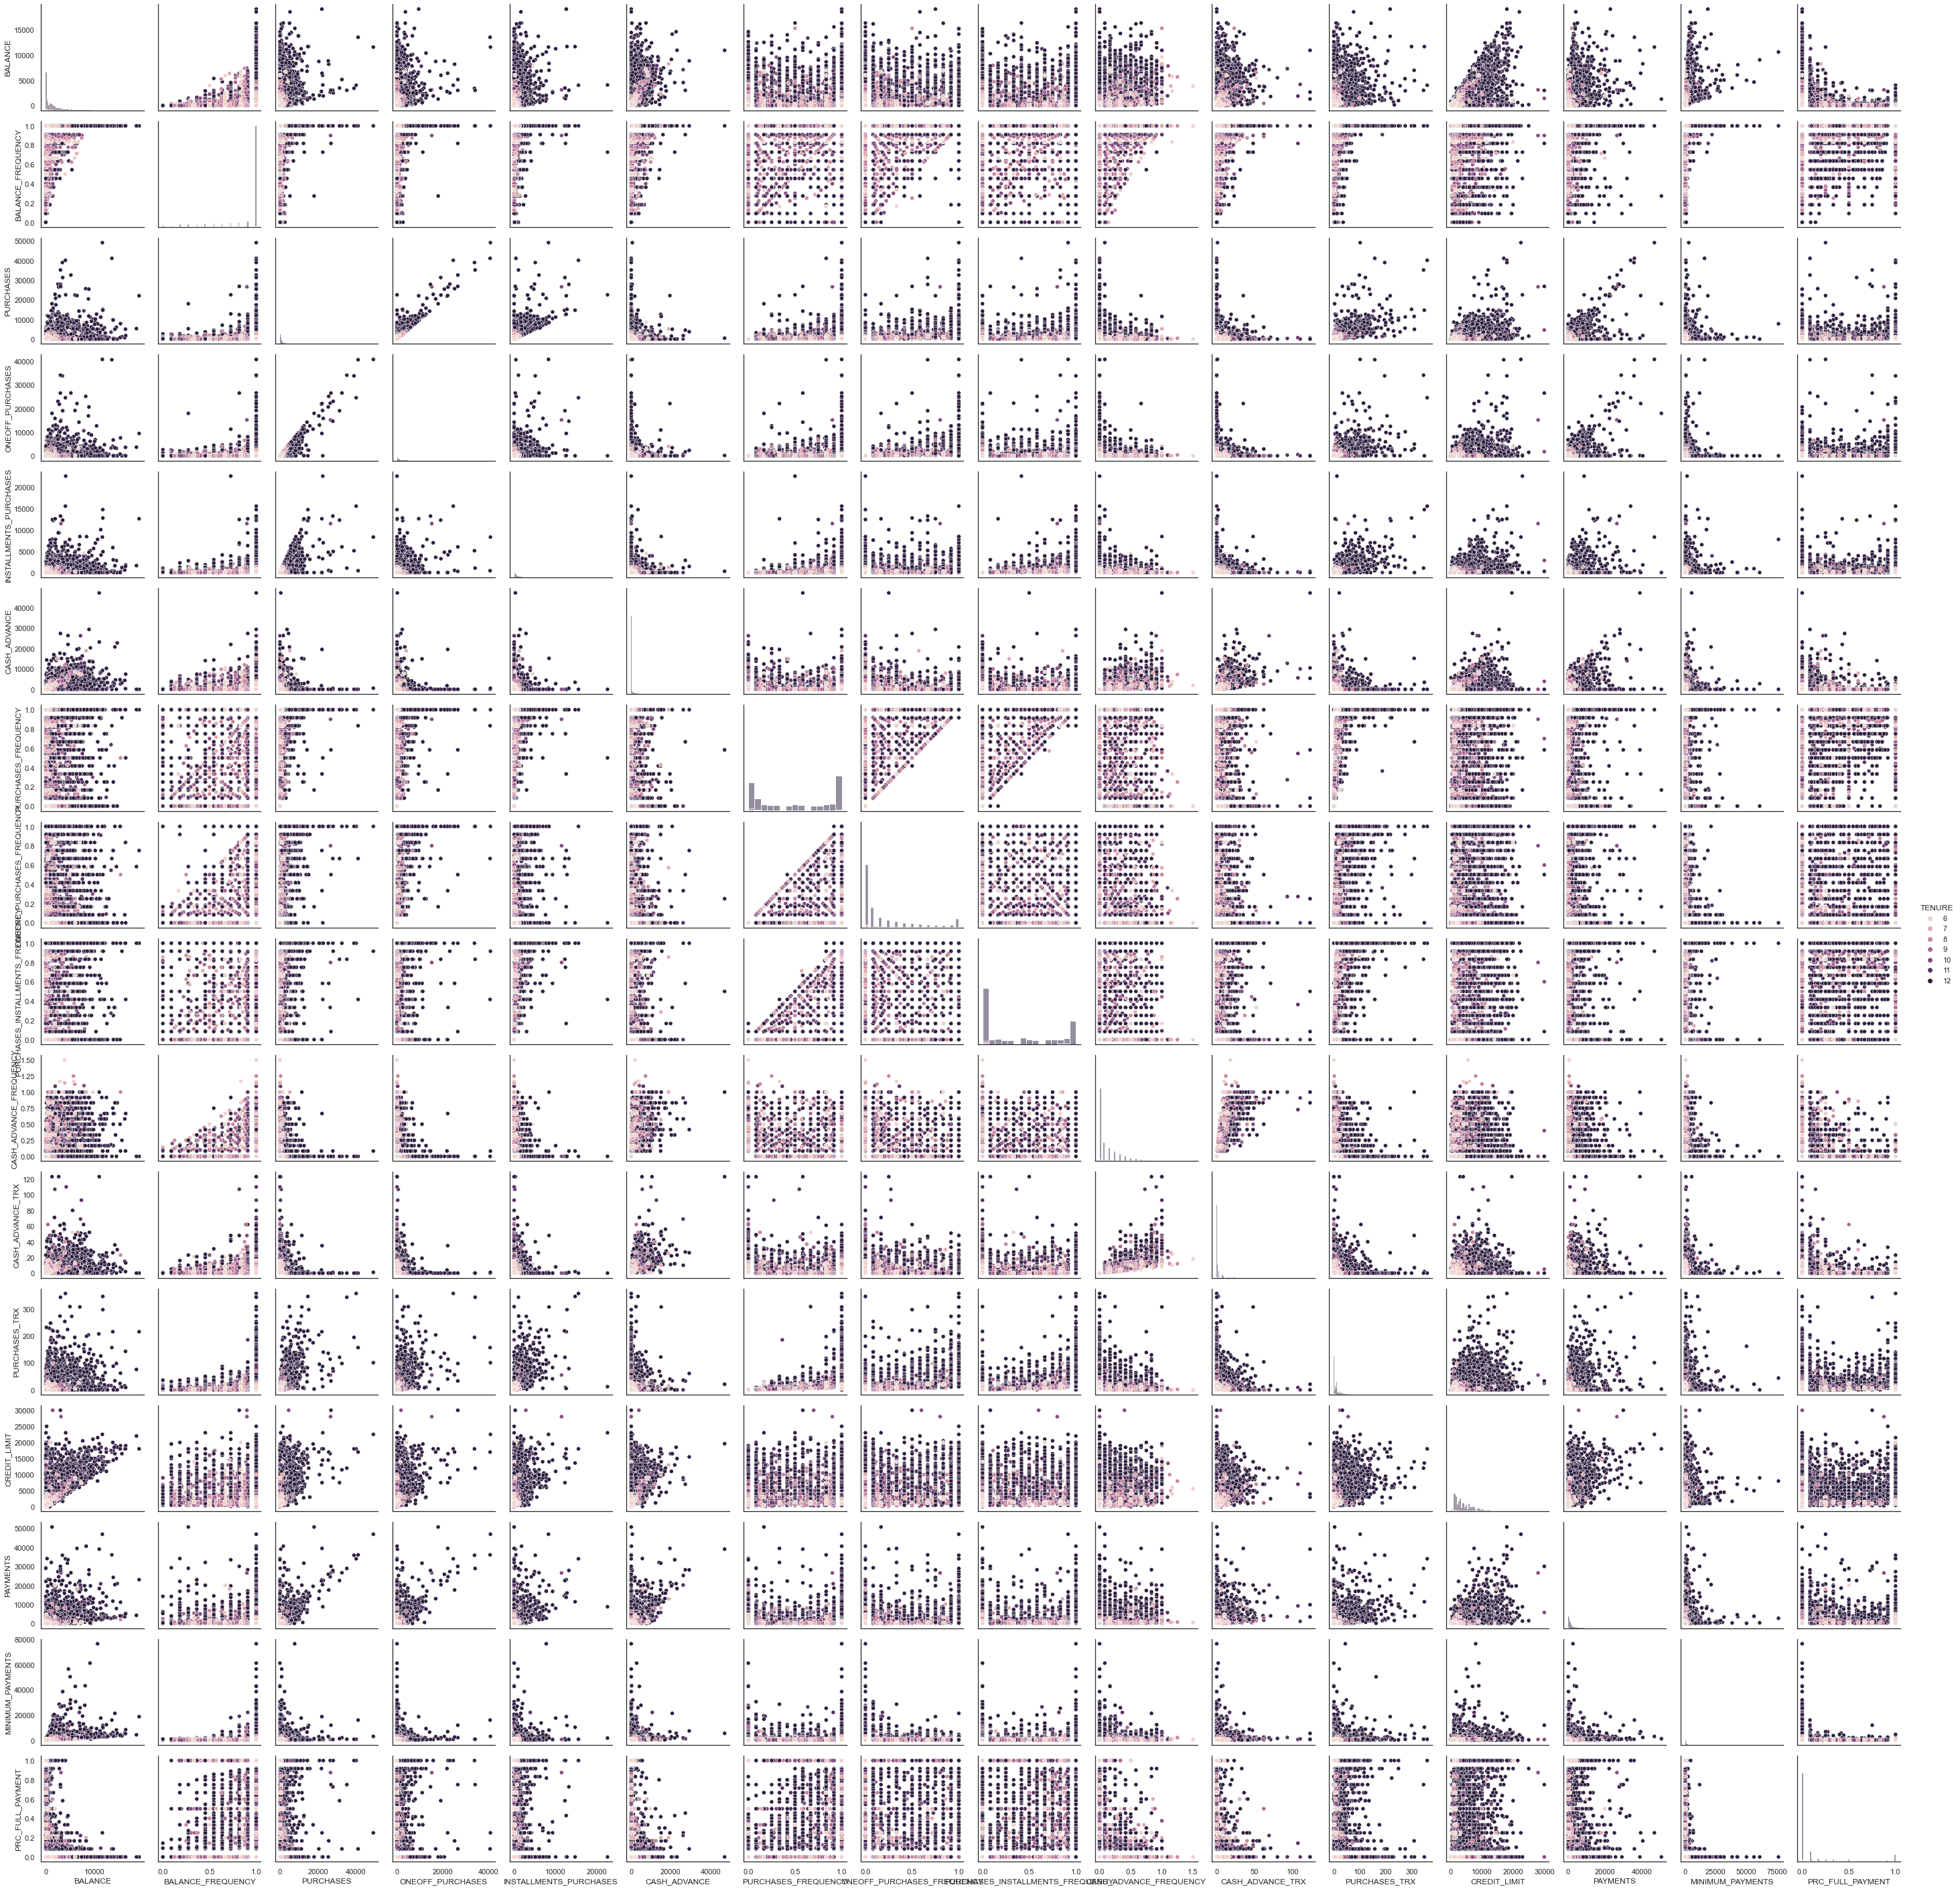

In [36]:
#https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.PairGrid(Credit_Card_Data, hue="TENURE")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()